**Dataset**
labeled datasset collected from twitter (Lab 1 - Hate Speech.tsv)

**Objective**
classify tweets containing hate speech from other tweets. <br>
0 -> no hate speech <br>
1 -> contains hate speech <br>


**Evaluation metric**
macro f1 score

### Import used libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import emoji
import contractions 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
import gensim.downloader as api
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report, confusion_matrix, f1_score


### Load Dataset

###### Note: search how to load the data from tsv file

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', 500)

In [3]:
df = pd.read_csv("Hate Speech.tsv", sep= "\t", index_col='id')
df.head(100)

,label,tweet
id,,
1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
3,0,bihday your majesty
4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
5,0,factsguide: society now #motivation
6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦


In [5]:
df.shape

(31535, 2)

In [6]:
df.count()

label    31535
tweet    31535
dtype: int64

### Data splitting

It is a good practice to split the data before EDA helps maintain the integrity of the machine learning process, prevents data leakage, simulates real-world scenarios more accurately, and ensures reliable model performance evaluation on unseen data.

In [7]:
X = df['tweet']
y = df['label']

In [8]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

In [9]:
X_train.shape, X_val.shape, X_test.shape

((22074,), (4730,), (4731,))

In [10]:
y_val.value_counts(), y_test.value_counts(), y_train.value_counts()

(label
 0    4398
 1     332
 Name: count, dtype: int64,
 label
 0    4399
 1     332
 Name: count, dtype: int64,
 label
 0    20525
 1     1549
 Name: count, dtype: int64)

### EDA on training data

- check NaNs

In [4]:
df.isnull().sum()

label    0
tweet    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31535 entries, 1 to 31962
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   31535 non-null  int64 
 1   tweet   31535 non-null  object
dtypes: int64(1), object(1)
memory usage: 739.1+ KB


- check duplicates

In [6]:
df.duplicated().sum()

2404

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

0

- show a representative sample of data texts to find out required preprocessing steps

In [16]:
df['tweet'].sample(10, random_state=42)

id
25746    @user  sirrr getting new one wowwww...  to see this plss take care of urself...love youððâ¤ï¸â¤ï¸â¤ï¸â¤ï¸
6540                                        the @user gave #words with #ibbleobble some #fabtastic feedback! we're really  ! â¦
6849         sweet dreams!  ðððððªðª (ððð) #selfie #selfietime #goodnight #guy #cute   #boy #momentsâ¦
9561                                            keep doing what makes you  . nothing else matters.   #nature #park #people #love
13105                                                                4 day weekend coming up and american speedfest @user   ð
6647                                                                                                           happy zen spirit:
15353                                                when is this gonna happen to me ð© #aladdin    #notme  #wishitwssme # no.
12266                                     fracus-mirage-(ng056)-web-2006-ukhx_int . #next gene

- check dataset balancing

In [18]:
df['label'].value_counts(normalize=True)

label
0    0.931722
1    0.068278
Name: proportion, dtype: float64

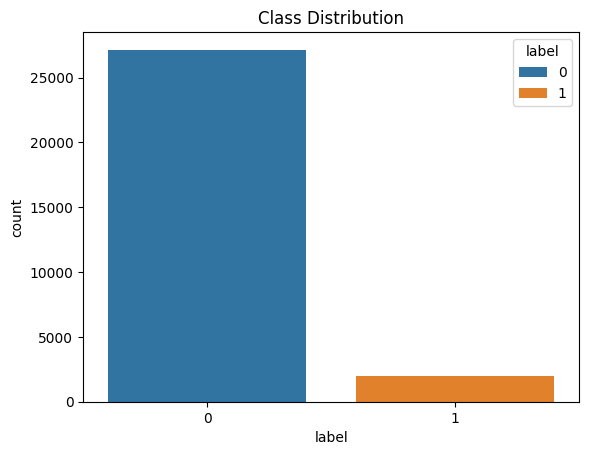

In [19]:
sns.countplot(x='label', data=df, hue='label')
plt.title("Class Distribution")
plt.show()

- Cleaning and Preprocessing are:
    - 1 Convert text to lowercase
    - 2 Remove URLs
    - 3 Remove mentions (@user) and hashtags (#tag)
    - 4 Remove emojis and non-ASCII characters
    - 5 Remove punctuation
    - 6 Remove extra whitespace
    - 7 Tokenize and remove stopwords
    - 8 Lemmatize words

### Cleaning and Preprocessing

#### Extra: use custom scikit-learn Transformers

Using custom transformers in scikit-learn provides flexibility, reusability, and control over the data transformation process, allowing you to seamlessly integrate with scikit-learn's pipelines, enabling you to combine multiple preprocessing steps and modeling into a single workflow. This makes your code more modular, readable, and easier to maintain.

##### link: https://www.andrewvillazon.com/custom-scikit-learn-transformers/

#### Example usage:

In [20]:
# class CustomTransformer(BaseEstimator, TransformerMixin):
#     def __init__(self, parameter1, parameter2):
#         self.parameter1 = parameter1
#         self.parameter2 = parameter2
        
#         # Add any initialization code here
    
#     def fit(self, X, y=None):
#         # Add code for fitting the transformer here
#         return X
    
#     def transform(self, X):
#         # Add code for transforming the data here
#         transformed_X = X.copy()  # Example: Just copying the data
        
#         # Example transformation
#         transformed_X['feature1'] = transformed_X['feature1'] * self.parameter1
#         transformed_X['feature2'] = transformed_X['feature2'] * self.parameter2
        
#         # Do all the needed transformations and data preprocessing here
        
#         return transformed_X
    
#     def fit_transform(self, X, y=None):
#         # This function combines fit and transform
#         self.fit(X, y)
#         return self.transform(X)

In [9]:
nltk.download('stopwords')
nltk.download('wordnet')

class Preprocessing(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()
        self.stop_words = set(stopwords.words('english'))

    def fit(self, X, y=None):
        # No fitting is needed, so we just return self
        return self

    def transform(self, X):
        return X.apply(self.preprocess)

    def preprocess(self, text):
        
        text = text.lower()
        text = contractions.fix(text)
        text = re.sub(r'http\S+|www\S+|@\w+|#', '', text)
        text = emoji.replace_emoji(text, replace='')
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        text = re.sub(r'\s+', ' ', text).strip()
        words = text.split()
        words = [self.lemmatizer.lemmatize(w) for w in words if w not in self.stop_words]
        return ' '.join(words)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abdal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\abdal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# preprocessor = Preprocessing()
# clean_text = preprocessor.fit_transform(df['tweet'])

In [ ]:
# clean_df = pd.DataFrame({'clean_tweet':clean_text ,'tweet': df['tweet'], 'label': df['label']})

In [ ]:
# clean_df.to_csv("cleaned_tweets.csv", index=False)

In [29]:
class Vectorizer(BaseEstimator, TransformerMixin):
    def __init__(self, method="BOW", ngram_range=(1, 1), vector_size=300, max_len=100, num_words=1000):
        self.method = method
        self.ngram_range = ngram_range
        self.vector_size = vector_size
        self.max_len = max_len
        self.num_words = num_words

    def fit(self, X, y=None):
        texts = X.values
        method = self.method.upper()

        if method == "BOW":
            self.vectorizer_ = CountVectorizer()
            self.vectorizer_.fit(texts)

        elif method in ["TFIDF", "NGRAM"]:
            self.vectorizer_ = TfidfVectorizer(ngram_range=self.ngram_range)
            self.vectorizer_.fit(texts)

        elif method == "WORD2VEC":
            self.embeddings_ = api.load("word2vec-google-news-300")

        elif method == "GLOVE":
            self.embeddings_ = api.load("glove-wiki-gigaword-300")

        elif method == "FASTTEXT":
            self.embeddings_ = api.load("fasttext-wiki-news-subwords-300")

        elif method == "CNN":
            self.tokenizer_ = Tokenizer(num_words=self.num_words)
            self.tokenizer_.fit_on_texts(texts)
            self._build_cnn()

        else:
            raise ValueError(f"Unknown vectorizer method: {self.method}")

        return self

    def transform(self, X):
        texts = X.values
        method = self.method.upper()

        if method in ["BOW", "TFIDF", "NGRAM"]:
            return self.vectorizer_.transform(texts)

        elif method in ["WORD2VEC", "GLOVE", "FASTTEXT"]:
            return np.vstack([self._avgvec(text) for text in texts])

        elif method == "CNN":
            sequences = self.tokenizer_.texts_to_sequences(texts)
            padded = pad_sequences(sequences, maxlen=self.max_len)
            return self.cnn_model_.predict(padded, verbose=0)

        else:
            raise ValueError(f"Unknown vectorizer method: {self.method}")

    def _avgvec(self, text):
        tokens = text.split()
        vectors = [self.embeddings_[word] for word in tokens if word in self.embeddings_]
        if not vectors:
            return np.zeros(self.vector_size)
        return np.mean(vectors, axis=0)

    def _build_cnn(self):
        self.cnn_model_ = Sequential([
            Embedding(input_dim=self.num_words, output_dim=128, input_length=self.max_len),
            Conv1D(filters=64, kernel_size=5, activation='relu'),
            GlobalMaxPooling1D(),
            Dense(100, activation='relu')
        ])
        self.cnn_model_.compile(optimizer='adam', loss='binary_crossentropy')

**You  are doing Great so far!**

### Modelling

#### Extra: use scikit-learn pipline

##### link: https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

Using pipelines in scikit-learn promotes better code organization, reproducibility, and efficiency in machine learning workflows.

#### Example usage:

In [40]:
rf_model = RandomForestClassifier()

pipeline = ImbPipeline(steps=[
    ('preprocessing', Preprocessing()),
    ('Vectorizing', Vectorizer(method="TFIDF")),
    ('model', rf_model),
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing', Preprocessing()),
                ('Vectorizing', Vectorizer(method='TFIDF')),
                ('model', RandomForestClassifier())])

In [41]:
y_pred = pipeline.predict(X_test)

RandomForestClassifier with SMOTE to handle imbalanced classification problems (oversampling)

In [42]:
rf_model2 = RandomForestClassifier()

pipeline2 = ImbPipeline(steps=[
    ('preprocessing', Preprocessing()),
    ('Vectorizing', Vectorizer(method="TFIDF")),
    ('sampling', SMOTE(random_state=42)),
    ('model', rf_model2),
])

pipeline2.fit(X_train, y_train)

Pipeline(steps=[('preprocessing', Preprocessing()),
                ('Vectorizing', Vectorizer(method='TFIDF')),
                ('sampling', SMOTE(random_state=42)),
                ('model', RandomForestClassifier())])

In [43]:
y_pred2 = pipeline2.predict(X_test)

#### Evaluation

**Evaluation metric:**
macro f1 score

Macro F1 score is a useful metric in scenarios where you want to evaluate the overall performance of a multi-class classification model, **particularly when the classes are imbalanced**

![Calculation](https://assets-global.website-files.com/5d7b77b063a9066d83e1209c/639c3d934e82c1195cdf3c60_macro-f1.webp)

RandomForestClassifier with TFIDF

In [44]:
print(classification_report(y_test, y_pred))
macro_f1 = f1_score(y_test, y_pred, average='macro')
print("Macro F1 Score:", macro_f1)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4399
           1       0.90      0.58      0.70       332

    accuracy                           0.97      4731
   macro avg       0.93      0.79      0.84      4731
weighted avg       0.96      0.97      0.96      4731

Macro F1 Score: 0.8413188703569


RandomForestClassifier with TFIDF and SMOTE

In [45]:
print(classification_report(y_test, y_pred2))
macro_f1 = f1_score(y_test, y_pred2, average='macro')
print("Macro F1 Score:", macro_f1)

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      4399
           1       0.56      0.61      0.59       332

    accuracy                           0.94      4731
   macro avg       0.77      0.79      0.78      4731
weighted avg       0.94      0.94      0.94      4731

Macro F1 Score: 0.7766763435530695


### Enhancement

- Using different vectorizers with different hyperparameters
- Trying different ML models and doing hyperparameter tuning

In [73]:
models = {
    "LogisticRegression": LogisticRegression(),
    "SVM": SVC(),
    "RandomForest": RandomForestClassifier()
}

In [74]:
vectorizers = [
    {"method": "BOW"},
    {"method": "TFIDF"},
    {"method": "WORD2VEC"},
    {"method": "GLOVE"},
    {"method": "FASTTEXT"},
    {"method": "CNN"}
]

In [75]:
results = []

for vec_params in vectorizers:
    vec_name = vec_params["method"]
    for model_name, model in models.items():
        print(f"Training with {vec_name} + {model_name}")

        pipeline = ImbPipeline(steps=[
            ('preprocessing', Preprocessing()),
            ('vectorizing', Vectorizer(**vec_params)),
            ('sampling', SMOTE(random_state=42)),
            ('model', model)
        ])

        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        f1 = f1_score(y_test, y_pred, average='macro')
        results.append((vec_name, model_name, f1))
        print(classification_report(y_test, y_pred))
        print(f"Macro F1-score: {f1:.4f}\n")


Training with BOW + LogisticRegression
              precision    recall  f1-score   support

           0       0.98      0.91      0.94      4399
           1       0.36      0.70      0.47       332

    accuracy                           0.89      4731
   macro avg       0.67      0.80      0.71      4731
weighted avg       0.93      0.89      0.91      4731

Macro F1-score: 0.7069

Training with BOW + SVM
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      4399
           1       0.44      0.48      0.46       332

    accuracy                           0.92      4731
   macro avg       0.70      0.72      0.71      4731
weighted avg       0.92      0.92      0.92      4731

Macro F1-score: 0.7092

Training with BOW + RandomForest
              precision    recall  f1-score   support

           0       0.97      0.91      0.94      4399
           1       0.33      0.58      0.42       332

    accuracy                          

c:\Users\abdal\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.96      0.53      0.68      4399
           1       0.10      0.70      0.18       332

    accuracy                           0.54      4731
   macro avg       0.53      0.62      0.43      4731
weighted avg       0.90      0.54      0.65      4731

Macro F1-score: 0.4302

Training with CNN + SVM


c:\Users\abdal\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.96      0.70      0.81      4399
           1       0.13      0.61      0.22       332

    accuracy                           0.70      4731
   macro avg       0.55      0.66      0.52      4731
weighted avg       0.90      0.70      0.77      4731

Macro F1-score: 0.5154

Training with CNN + RandomForest


c:\Users\abdal\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.95      0.96      0.95      4399
           1       0.37      0.32      0.34       332

    accuracy                           0.91      4731
   macro avg       0.66      0.64      0.65      4731
weighted avg       0.91      0.91      0.91      4731

Macro F1-score: 0.6489



In [76]:
results_df = pd.DataFrame(results, columns=["Vectorizer", "Model", "Macro F1-score"])
results_df.sort_values(by="Macro F1-score", ascending=False, inplace=True)
print(results_df)


   Vectorizer               Model  Macro F1-score
7    WORD2VEC                 SVM        0.825535
10      GLOVE                 SVM        0.796886
4       TFIDF                 SVM        0.793395
5       TFIDF        RandomForest        0.783049
8    WORD2VEC        RandomForest        0.782525
13   FASTTEXT                 SVM        0.781720
14   FASTTEXT        RandomForest        0.781121
11      GLOVE        RandomForest        0.779981
3       TFIDF  LogisticRegression        0.763520
6    WORD2VEC  LogisticRegression        0.719146
12   FASTTEXT  LogisticRegression        0.709343
1         BOW                 SVM        0.709231
0         BOW  LogisticRegression        0.706926
9       GLOVE  LogisticRegression        0.692541
2         BOW        RandomForest        0.677657
17        CNN        RandomForest        0.648905
16        CNN                 SVM        0.515444
15        CNN  LogisticRegression        0.430227


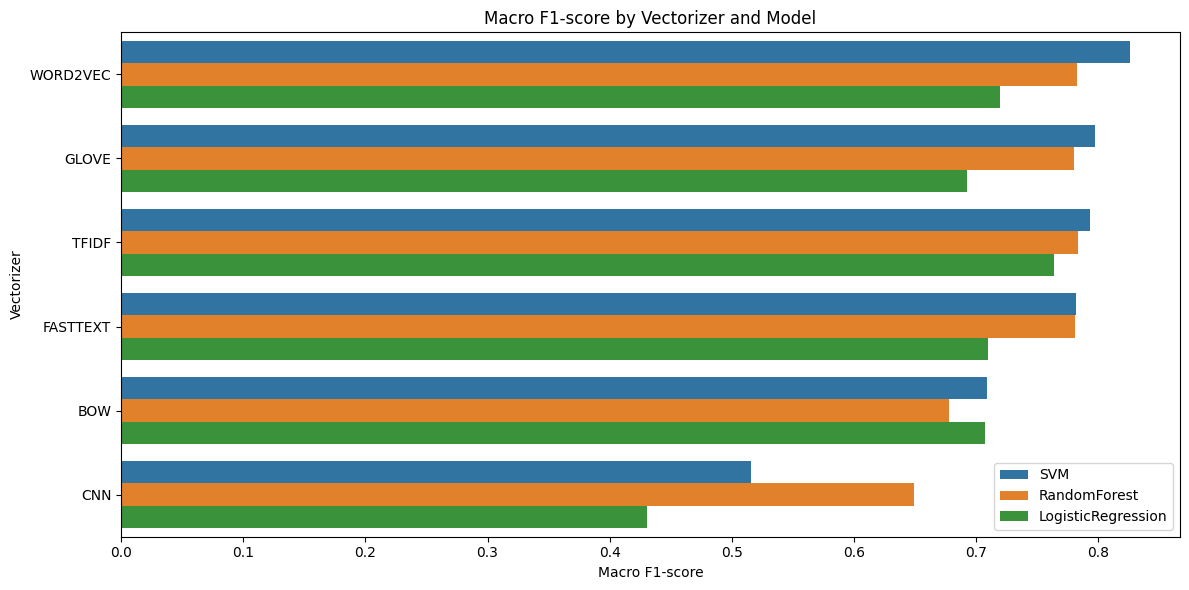

In [77]:
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x="Macro F1-score", y="Vectorizer", hue="Model")
plt.title("Macro F1-score by Vectorizer and Model")
plt.xlabel("Macro F1-score")
plt.ylabel("Vectorizer")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


Final Model

In [57]:
final_model = RandomForestClassifier(random_state=42)
final_vectorizer = TfidfVectorizer()

final_pipeline = ImbPipeline(steps=[
    ('preprocessing', Preprocessing()),
    ('vectorizer', final_vectorizer),
    ('smote', SMOTE(random_state=42)),
    ('model', final_model)
])

params = {
    'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'vectorizer__min_df': [1, 2],
    'vectorizer__max_df': [0.9, 1.0],
    'model__n_estimators': [100, 200, 300, 400, 500],
    'model__max_depth': [None, 10, 20]

}

In [58]:
grid_search = GridSearchCV(final_pipeline, param_grid=params, cv=3, scoring='f1_macro', verbose=1, n_jobs=1)

In [59]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 180 candidates, totalling 540 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing', Preprocessing()),
                                       ('vectorizer', TfidfVectorizer()),
                                       ('smote', SMOTE(random_state=42)),
                                       ('model',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=1,
             param_grid={'model__max_depth': [None, 10, 20],
                         'model__n_estimators': [100, 200, 300, 400, 500],
                         'vectorizer__max_df': [0.9, 1.0],
                         'vectorizer__min_df': [1, 2],
                         'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)]},
             scoring='f1_macro', verbose=1)

In [60]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'model__max_depth': None, 'model__n_estimators': 400, 'vectorizer__max_df': 0.9, 'vectorizer__min_df': 2, 'vectorizer__ngram_range': (1, 3)}


### Conclusion and final results


In [61]:
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

In [62]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      4399
           1       0.71      0.63      0.67       332

    accuracy                           0.96      4731
   macro avg       0.84      0.81      0.82      4731
weighted avg       0.95      0.96      0.95      4731



#### Done!